# **GitHub Exercise**

# In this exercise, we have a simple scientific analysis that needs to be made public. We wish to share the source code of our analysis and to make sure that future changes to the code will not break the existing results.

##For this exercise, you'll create your own github repository, create branches, commit code changes and write unit tests of the code that will be essential for exercise next week.

## Our scientific analysis consists of the code below, which generates data, computes statistics and plots the results.









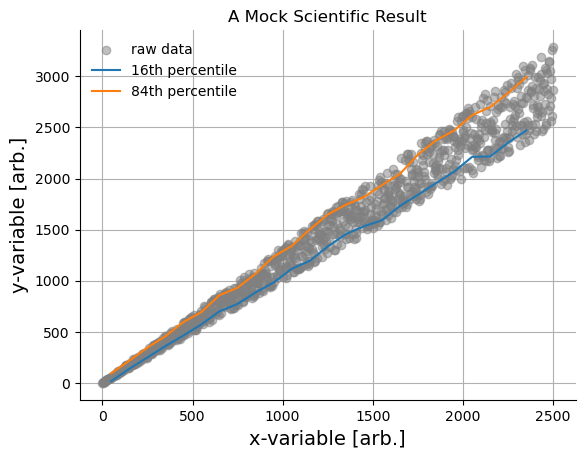

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

def plot_analysis(raw_data: pd.DataFrame,
                  fit_results: pd.DataFrame) -> None:
    """Plot the results of the analysis.

    Args:
        raw_data: a dataframe containing the raw data.
        fit_results: a dataframe containing the results of the analysis.
    """
    ax = plt.subplot(111)
    ax.set_axisbelow(True)
    ax.scatter(raw_data['x'], raw_data['y'], label = 'raw data', color = 'grey', alpha = 0.5)
    ax.plot(fit_results['x_mean'], fit_results['pct16'], label = '16th percentile')
    ax.plot(fit_results['x_mean'], fit_results['pct84'], label = '84th percentile')
    ax.legend(frameon = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title('A Mock Scientific Result')
    ax.set_xlabel('x-variable [arb.]', size = 14)
    ax.set_ylabel('y-variable [arb.]', size = 14)
    ax.grid(True)


def analyse_data(raw_data: pd.DataFrame) -> pd.DataFrame:
    """Produce and analyse raw data.

       Function fits 16th and 84th percentiles.

    Args:
        raw_data: a dataframe containing the raw data.

    Returns:
        pd.DataFrame containing fit results.
    """
    pct16 = []
    pct84 = []
    x_mean = []
    bins = np.arange(raw_data['x'].min(),raw_data['x'].max(), 100)
    for k in range(len(bins) -1):
        idx = (raw_data['x'] >= bins[k]) & (raw_data['x'] < bins[k+1])
        pct16.append(np.percentile(raw_data['y'][idx],16))
        pct84.append(np.percentile(raw_data['y'][idx],84))
        x_mean.append(np.mean(raw_data['x'][idx]))
    return pd.DataFrame({'pct16': pct16, 'pct84': pct84, 'x_mean': x_mean})

def generate_data(n: int = 1000) -> pd.DataFrame:
    """Generate data points.

    Args:
        n: Number of datapoints. Defaults to 1000.

    Returns:
        dataframe with raw data.
    """
    np.random.seed(42)
    x = np.linspace(0,2500, n)
    noise_component = np.random.rand(n)
    y = (x + x*noise_component/3)
    return pd.DataFrame({'x': x, 'y': y})

raw_data = generate_data()
fit_results = analyse_data(raw_data)
plot_analysis(raw_data = raw_data, fit_results = fit_results)



##Before you start this exercise, make sure you have a working GitHub user account. Also, make sure you have git installed locally.

##I recommend that you use VSCode and the GitHub extension. More details here: https://code.visualstudio.com/docs/sourcecontrol/github

# **Exercise 1.1**: Create a repository

## Create a **public** github repository with a README.md, and clone it locally to your machine.

In [ ]:
# See https://docs.github.com/en/repositories/creating-and-managing-repositories/quickstart-for-repositories
# and https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository

[https://github.com/aloysf/ds-tools](https://github.com/aloysf/ds-tools)

# **Exercise 1.2**: Make a branch and make changes

## You now have a local version of your repository, which means that you can make local changes to it without influencing the public repository.
## By default, your local repository will start at the `main` branch. It is often considered bad practice to make changes to the main branch directly, as it limits your ability to quickly undo local changes. A better practice is to create a new branch from the main branch. The new branch serves is an independent copy of the main branch on which we will make changes. Once we're happy with these changes, we'll merge the new branch with the main branch.


##Create a new, local branch called `my_first_branch` and `checkout` the branch. (i.e. move from `main` to `my_first_ branch`) .



# **Exercise 1.3**: Create a pip-installable python package

## **A)** Create a series of folders with the following structure in your local clone of the repository.

```
📦your_package_name
 ┣ 📂src
 ┃ ┗ 📂your_package_name
 ┃ ┃ ┣ 📂analysis
 ┃ ┃ ┃ ┗ 📜__init__.py
 ┃ ┃ ┣ 📂data
 ┃ ┃ ┃ ┗ 📜__init__.py
 ┃ ┃ ┣ 📂plotting
 ┃ ┃ ┃ ┗ 📜__init__.py
 ┃ ┃ ┗ 📜__init__.py
 ┗ 📜setup.py
```

## and add the following contents to `setup.py`

```python
from setuptools import setup, find_packages

setup(
    name='yourpackagename', # fill this
    version='0.0.0',    
    description='A example Python package',
    url='https://github.com/yourusername/yourpackagename', # fill this
    author='yourname', # fill this if you want
    author_email='none', # fill this if you want
    license='BSD 2-clause',
    packages=find_packages(where="src"),
    package_dir={"": "src"},
    install_requires=['pandas>2.0',
                      'numpy',
                      'matplotlib',
                      'pyarrow'                     
                      ],

    classifiers=[
        'Development Status :: 1 - Planning',
        'Intended Audience :: Science/Research',
        'License :: OSI Approved :: BSD License',  
        'Operating System :: POSIX :: Linux',        
        'Programming Language :: Python :: 2',
        'Programming Language :: Python :: 2.7',
        'Programming Language :: Python :: 3',
        'Programming Language :: Python :: 3.4',
        'Programming Language :: Python :: 3.5',
    ],
)
```
## **Note**: The `__init__.py` files are used by Python to indicate the presence of a module, and should be left empty for now.

.

## **B)** Commit the changes to your branch with a descriptive commit message and Publish your branch.



## **D)** Open your public github repository on GitHub.com. You should now see the the option to click "Compare & Pull request" from your new public branch. Click it and create a pull request with a good description of what your pull request does. This Pull request should attempt to merge the code from `my_first_branch` into the `main` branch.



## **E)** Merge the pull request, and syncronize your local repository with the new changes. I.e make sure your local `main` branch is up-to-date with the public `main` branch.

# **Exercise 1.3**: Add code to the project

## We now want to add the code from the beginning of this notebook to our github project.

**Note:** Wait with making a pull request with the changes below until instructed to do so.

## **A)** Checkout your local, updated `main` branch. Once on the `main` branch, create a new branch `feature_branch`. In this branch,  add a python file `plotting_tools.py` in `src/your_repo_name/plotting` that contains the function `plot_analysis`. Commit the changes to your local branch with a descriptive commit message.

## **B)** Add the line following line to `src/your_repo_name/plotting/__init__.py` and commit the changes with a descriptive commit message.

```python
from .plotting_tools.py import plot_analysis
```

## **C)** Add a python file `data_tools.py` in `src/your_repo_name/data` that contains the function `generate_data`. Commit the changes to your local branch with a descriptive commit message.


## **D)** Add the line following line to to `src/your_repo_name/data/__init__.py` and commit the changes with a descriptive commit message.

 ```python
 from .data_tools.py import generate_data
 ```

## **E)** Add a python file `analysis_tools.py` in `src/your_repo_name/analysis` that contains the function `analyse_data`. Commit the changes to your local branch with a descriptive commit message.

    


## **F)** Add the following line to `src/your_repo_name/analysis/__init__.py` and commit the changes with a descriptive commit message.

```python
 from .analysis_tools.py import analyse_data
 from .data.py import generate_data
 ```


## **G)**:  Using a terminal, go to the base path of your local GitHub Repositiory and install the package using `pip install --editable .` . The "editable" flag means pip will track the changes you make to your local repository, removing the need for re-installing the package everytime you change something. Verify that our mock scientific analysis runs:

In [ ]:
from your_repo_name.data import generate_data
from your_repo_name.analysis import analyse_data
from your_repo_name.plotting import plot_analysis

raw_data = generate_data()
fit_results = analyse_data(raw_data=raw_data)

plot_analysis(raw_data=raw_data,
              fit_results=fit_results)

## **H)**: You'll now notice that ~11 smaller files are created in the repository. These are files created during the pip installation, and you do not want these committed to the project. Add a `.gitignore` file under `/your_repo_name/.gitignore` that lists the files you want git to ignore automatically. Verify that the smaller files no longer shows up as local changes.

```yaml
# Byte-compiled / optimized / DLL files
__pycache__/
*.py[cod]
*$py.class

# C extensions
*.so

# Distribution / packaging
.Python
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
wheels/
pip-wheel-metadata/
share/python-wheels/
*.egg-info/
.installed.cfg
*.egg
MANIFEST
```

## **D)**:  Publish your branch, make a pull request from your `feature_branch` to the public `main`, merge it on GitHub and update your local `main`.

# **Exercise 1.4**: Add Unit tests

## In this exercise, you'll be tasked with writing unit tests that verifies that the code you just added to the github project indeed functions as expected.

## **A)**: Do the following in a new branch from your updated main: Add a new folder under `your_repo_name/tests/test_data`. Save the `raw_data` as `raw_data.parquet` and `fit_results` as  `fit_results.parquet` in that directory. Create an empty python file in `your_repo_name/tests/unit_tests.py`.


## **B)**: Write a function `test_data_generator` that generates the dataset using `generate_data` and checks if it's identical to the `raw_data.parquet` that you saved under  `your_repo_name/tests/test_data`. The function must raise an error if the two are not identical, and should not accept arguments. Add the function to the module in `your_repo_name/tests/unit_tests.py`.

**HINT**: If you add the following code to `your_repo_name/tests/unit_tests.py`, it will produce the path to `your_repo_name/tests/test_data`.

```python
import os.path

# This will produce the path to the test data on any OS and machine,
# if run inside unit_tests.py

# Strictly needed
TEST_DATA_DIR = os.path.abspath(
    os.path.join(os.path.dirname(__file__), "..", 'tests', 'test_data')
)
```

## **C)**: Write a function `test_analyse_data` that uses `analyse_data` on `raw_data.parquet` that you saved under  `your_repo_name/tests/test_data` and verify that the results are identical to `fit_results.parquet`. The function must raise an error if the two are not identical, and should not accept arguments. Add the function to the module in `your_repo_name/tests/unit_tests.py`

## **D)**: Write a function `test_full_analysis` that verifies that the entire analysis runs end-to-end without error. The function should not accept arguments. Add the function to the module in `your_repo_name/tests/unit_tests.py`

## **E)**: Verify that your unit tests passes without error using the terminal command

```bash
pytest your_repo_name/tests/*
```

##If your tests pass, commit your changes, make a pull request and merge it.

# **Exercise 2**: Add CI/CD Workflows on GitHub
## We want to make sure that any changes to the code base will not break our project. To ensure this, we want to setup a workflow that will run your unit tests automatically whenever someone makes a pull request. If there are breaking changes in the pull request, the tests will fail.

## This is an industry-standard way of ensuring that projects that are in use but under development is not broken by the development itself.

## **A)**: Update your main branch, create a fresh branch. On this updated branch, create a folder structure like so: `your_repo_name/.github/actions/install`. Place a file named `action.yml` in this new directory that adheres to the following template:

```yaml
name: 'Install your_repo_name'
description: 'Installs your_repo_name package'

runs:
  using: "composite"
  steps:
    - name: Install package
      run: |
        pip install .
      shell: bash
```

## **B)**: Create a folder structure like so: `your_repo_name/.github/actions/workflows`. Place a file named `build_and_test.yml` in this new directory with the follwing contents:

```yaml
# This is a simple workflow to run unit tests
name: Build

# Controls when the workflow will run
on:
  # Triggers the workflow on push and PRs
  push:
  pull_request:
    branches: [ main ]

  # Allows you to run this workflow manually from the Actions tab
  workflow_dispatch:

# A workflow run is made up of one or more jobs that can run sequentially or in parallel
jobs:

  build-matrix:
    name: Install package and run Unit tests
    runs-on: ubuntu-latest
    strategy:
     matrix:
        python-version: [3.8]
    steps:
      - uses: actions/checkout@v3
      - name: Set up Python ${{ matrix.python-version }}
        uses: actions/setup-python@v4
        with:
          python-version: ${{ matrix.python-version }}
      - name: Install package
        uses: ./.github/actions/install
      - name: Install pytest
        run: pip install pytest
      - name: Run unit tests and generate coverage report
        run: |
         set -o pipefail  # To propagate exit code from pytest
         pytest tests/*

```

## **C)** Commit your changes, make a pull request. On the pull request page on GitHub, verify that the workflows are now run and passing. Merge the pull request.

# **D)**: Update your main branch and create a new branch. Introduce breaking changes to the code base and make a pull request. Verify that on the pull request page, the checks no longer pass.